# Kunskapskontroll 3

In [1]:
### Import numpy, matplotlib, pandas, csv and basemap.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [3]:
### Load the data set "housing" through Pandas. 

In [4]:
houses = pd.read_csv("housing.csv")

In [5]:
### Inspecting the data.

In [6]:
### Are there any null values?

In [7]:
houses.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
### Drop rows with null/empty values.

In [9]:
houses.dropna(inplace=True)

In [10]:
### Look at the data information again.

In [11]:
houses.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
### Which rows have highest median house value for each ocean proximity such as <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN?

In [13]:
median = pd.read_csv('housing.csv', usecols=['median_house_value','ocean_proximity'])
idx = median.groupby('ocean_proximity')['median_house_value'].idxmax()
max_median_value = median.loc[idx]
print(max_median_value)

      median_house_value ocean_proximity
923             500001.0       <1H OCEAN
1583            500001.0          INLAND
8314            450000.0          ISLAND
89              500001.0        NEAR BAY
5276            500001.0      NEAR OCEAN


In [14]:
### Which rows have highest housing_median_age for each ocean proximity such as <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN?

In [15]:
median = pd.read_csv('housing.csv', usecols=['housing_median_age','ocean_proximity'])
idx = median.groupby('ocean_proximity')['housing_median_age'].idxmax()
max_median_value = median.loc[idx]
print(max_median_value)

      housing_median_age ocean_proximity
2651                52.0       <1H OCEAN
975                 52.0          INLAND
8315                52.0          ISLAND
2                   52.0        NEAR BAY
2538                52.0      NEAR OCEAN


In [16]:
### Total number of rooms, bedrooms, population and households group by ocean proximity.

In [17]:
total = pd.read_csv('housing.csv', usecols=['total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity'])
print(total.groupby('ocean_proximity').sum())

                 total_rooms  total_bedrooms  population  households
ocean_proximity                                                     
<1H OCEAN         24012547.0       4937435.0  13889374.0   4730118.0
INLAND            17803933.0       3468095.0   9112744.0   3127759.0
ISLAND                7873.0          2102.0      3340.0      1383.0
NEAR BAY           5710320.0       1167195.0   2817427.0   1118931.0
NEAR OCEAN         6867477.0       1415482.0   3598955.0   1332308.0


In [18]:
### Households with most rooms group by ocean proximity.

In [19]:
print (houses.groupby('ocean_proximity')['total_rooms'].sum() / houses.groupby('ocean_proximity')['households'].sum())

ocean_proximity
<1H OCEAN     5.077574
INLAND        5.692915
ISLAND        5.692697
NEAR BAY      5.111147
NEAR OCEAN    5.158557
dtype: float64


In [20]:
### Average median house value group by ocean proximity.

In [21]:
print (houses.groupby('ocean_proximity')['median_house_value'].mean())

ocean_proximity
<1H OCEAN     240267.990812
INLAND        124896.863147
ISLAND        380440.000000
NEAR BAY      259279.292070
NEAR OCEAN    249042.355023
Name: median_house_value, dtype: float64


In [22]:
### Top 15 locations with highest median house value.

In [23]:
houses.nlargest(n=15, columns=['median_house_value'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY
510,-122.22,37.82,39.0,2492.0,310.0,808.0,315.0,11.8603,500001.0,NEAR BAY
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,NEAR BAY
512,-122.23,37.82,52.0,3242.0,366.0,1001.0,352.0,12.2138,500001.0,NEAR BAY
514,-122.23,37.82,52.0,3494.0,396.0,1192.0,383.0,12.3804,500001.0,NEAR BAY
517,-122.23,37.82,52.0,1611.0,203.0,556.0,179.0,8.7477,500001.0,NEAR BAY


In [24]:
### Top 15 locations with lowest median house value.

In [25]:
houses.nsmallest(n=15, columns=['median_house_value'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
1825,-122.32,37.93,33.0,296.0,73.0,216.0,63.0,2.6750,22500.0,NEAR BAY
13889,-116.57,35.43,8.0,9975.0,1743.0,6835.0,1439.0,2.7138,22500.0,INLAND
14326,-117.16,32.71,52.0,845.0,451.0,1230.0,375.0,1.0918,22500.0,NEAR OCEAN
16186,-121.29,37.95,52.0,107.0,79.0,167.0,53.0,0.7917,22500.0,INLAND
2779,-114.65,32.79,21.0,44.0,33.0,64.0,27.0,0.8571,25000.0,INLAND


In [26]:
### Visualization.

In [27]:
### World map with the locactions of the houses.
###
### The code is from: 
### https://kanoki.org/python-plotting-latitude-and-longitude-from-csv-on-map-using-basemap-folium-geopandas-and-plotly.

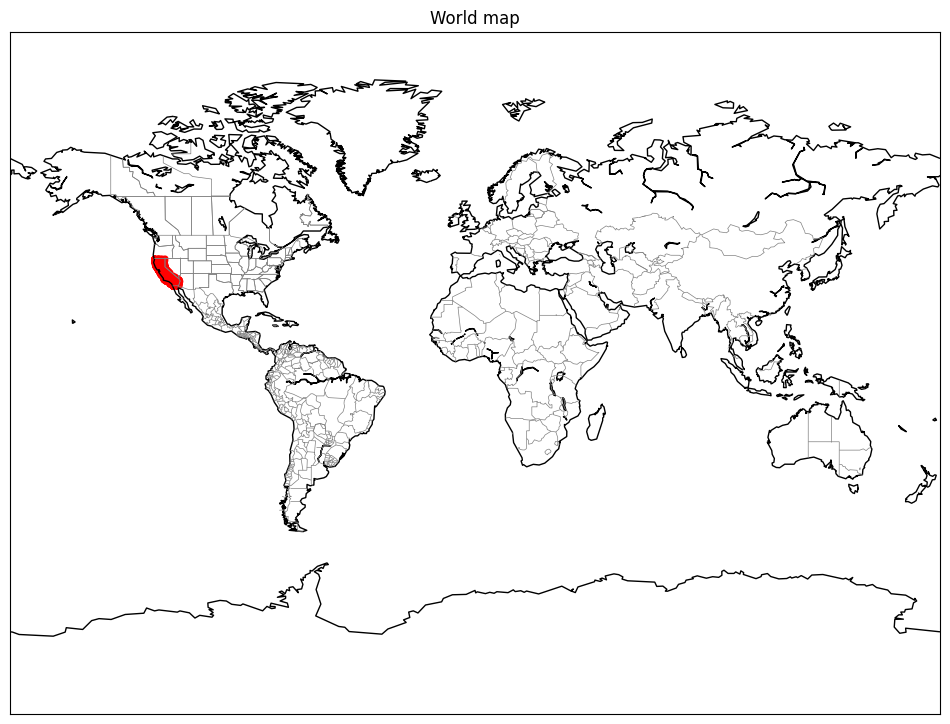

In [28]:
plt.figure(figsize=(12,9))

m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')

lat = houses["latitude"]
lon = houses["longitude"]

m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = 'o', alpha = 1)

plt.title("World map")
plt.show()

In [29]:
### Population by location.

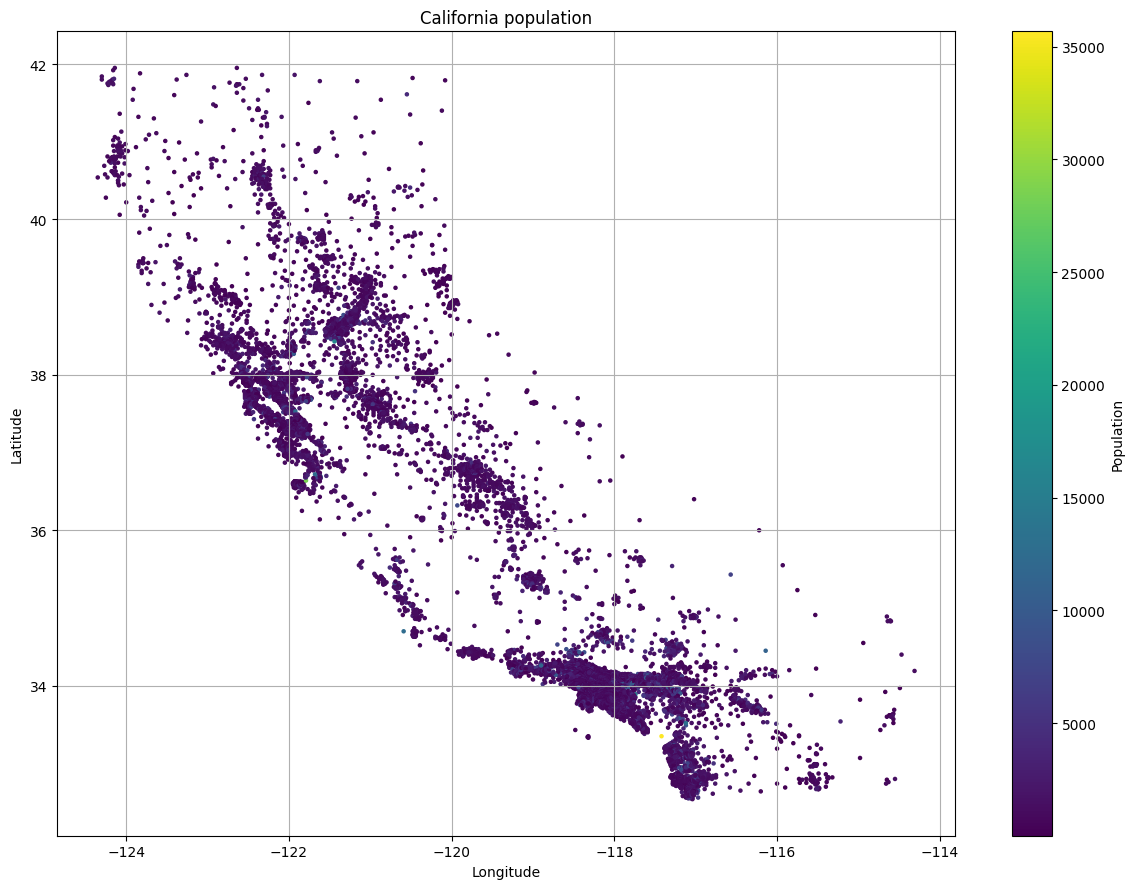

In [30]:
plt.figure(figsize=(12, 9))
scatter = plt.scatter(houses["longitude"],houses["latitude"],c=houses["population"], alpha=1,s=5)

plt.colorbar(scatter, label="Population")
plt.title("California population")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
### Total number of population group by ocean proximity.

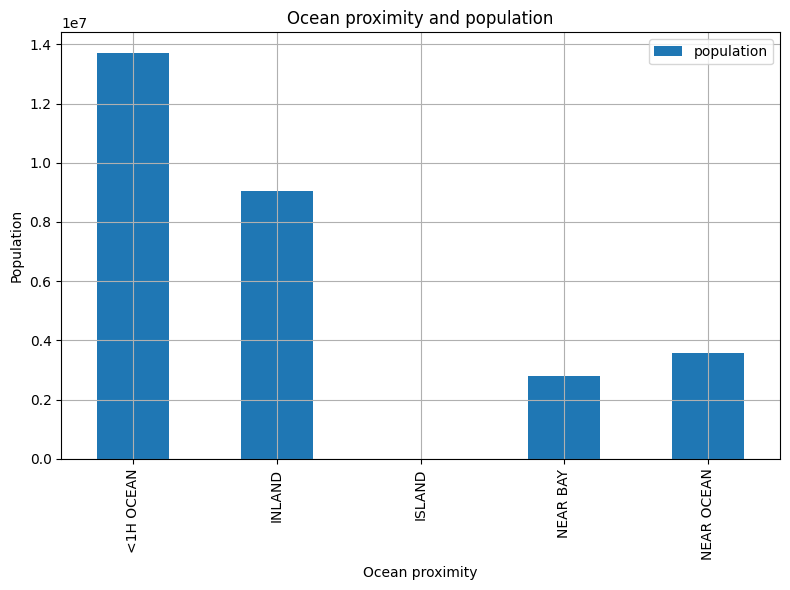

In [32]:
houses.groupby('ocean_proximity')['population'].sum().plot.bar(subplots=True,figsize=(8,6))

plt.title("Ocean proximity and population")
plt.xlabel("Ocean proximity")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

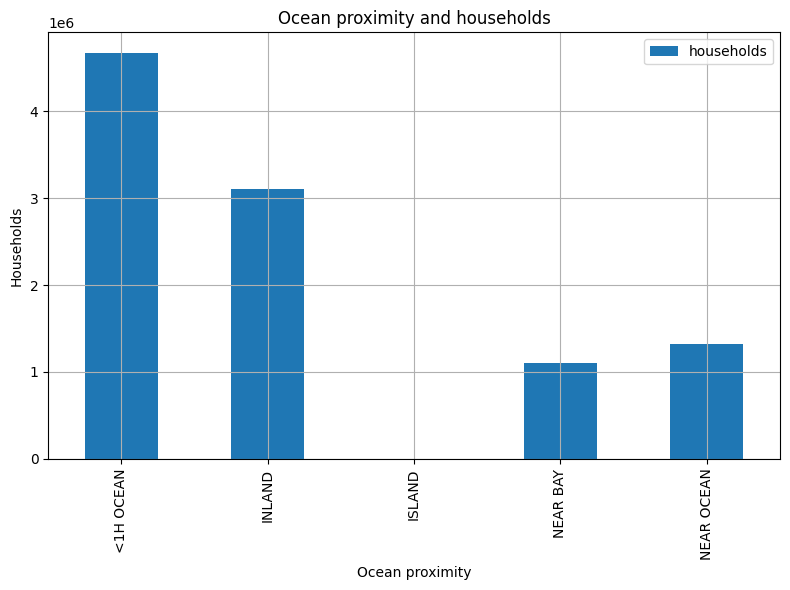

In [33]:
houses.groupby('ocean_proximity')['households'].sum().plot.bar(subplots=True,figsize=(8,6))

plt.title("Ocean proximity and households")
plt.xlabel("Ocean proximity")
plt.ylabel("Households")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [34]:
### Average housing median age group by ocean proximity.

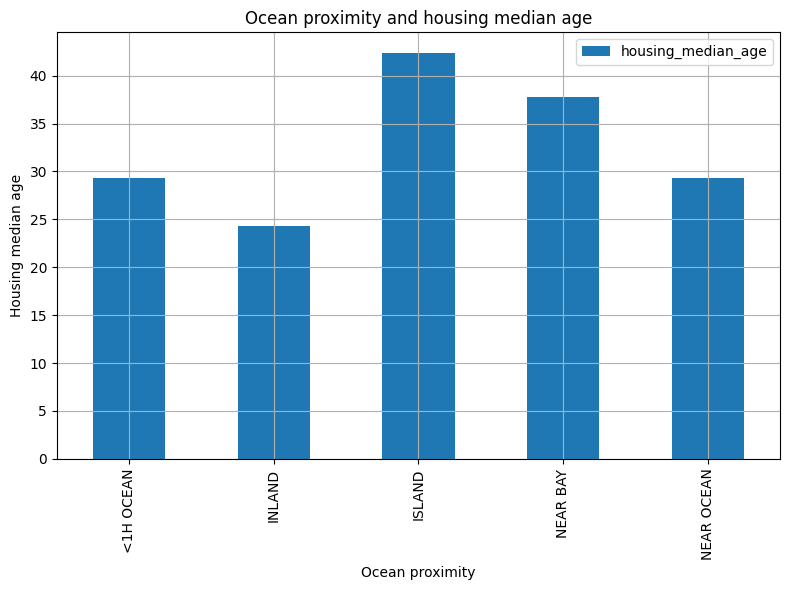

In [35]:
houses.groupby('ocean_proximity')['housing_median_age'].mean().plot.bar(subplots=True,figsize=(8,6))

plt.title("Ocean proximity and housing median age")
plt.xlabel("Ocean proximity")
plt.ylabel("Housing median age")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [36]:
### Average median house value group by ocean proximity.

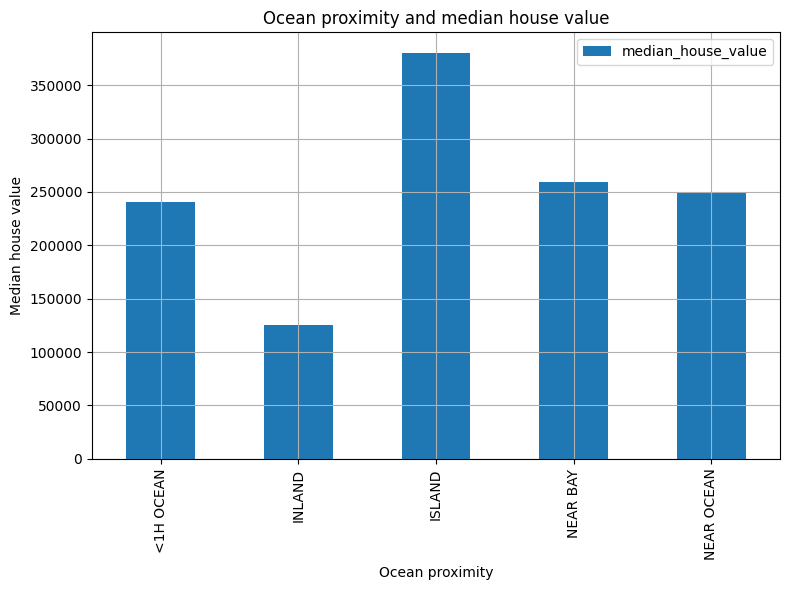

In [37]:
houses.groupby('ocean_proximity')['median_house_value'].mean().plot.bar(subplots=True,figsize=(8,6))

plt.title("Ocean proximity and median house value")
plt.xlabel("Ocean proximity")
plt.ylabel("Median house value")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [38]:
### Average median income group by ocean proximity.

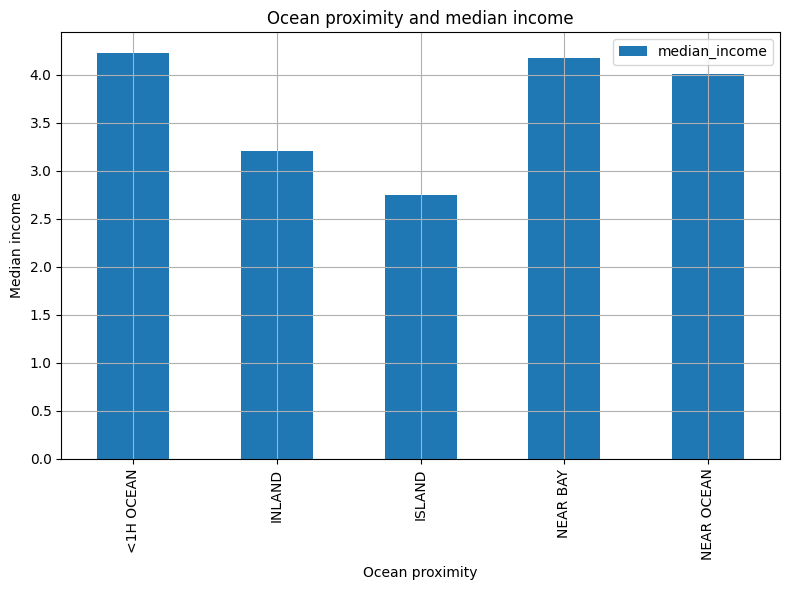

In [39]:
houses.groupby('ocean_proximity')['median_income'].mean().plot.bar(subplots=True,figsize=(8,6))

plt.title("Ocean proximity and median income")
plt.xlabel("Ocean proximity")
plt.ylabel("Median income")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()